In [1]:
# Installing required packages

!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats

# For inline plotting
%matplotlib inline

In [3]:
# Load the dataset

df = pd.read_csv("Time-Wasters on Social Media.csv")

In [4]:
# Display first few rows

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0       1   56    Male       Pakistan   82812   True           True   
1       2   46  Female         Mexico   27999  False           True   
2       3   32  Female  United States   42436  False           True   
3       4   60    Male         Barzil   62963   True          False   
4       5   25    Male       Pakistan   22096  False           True   

      Profession Demographics   Platform  ...  ProductivityLoss  Satisfaction  \
0       Engineer        Rural  Instagram  ...                 3             7   
1         Artist        Urban  Instagram  ...                 5             5   
2       Engineer        Rural   Facebook  ...                 6             4   
3  Waiting staff        Rural    YouTube  ...                 3             7   
4        Manager        Urban     TikTok  ...                 8             2   

      Watch Reason  DeviceType       OS  Watch Time  Self

In [5]:
# Check data info and missing values

print("\nData Info:")
df.info()
print("\nMissing values count:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length 

In [6]:
# Identify numeric and categorical columns

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

In [7]:
# Fill missing numeric values with the median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with the most frequent value (mode)
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [8]:
# Remove outliers using the IQR method (applied to numeric columns)

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# Exploratory Data Analysis (EDA)

# Basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
            UserID          Age        Income  Total Time Spent  \
count  1000.000000  1000.000000   1000.000000       1000.000000   
mean    500.500000    40.986000  59524.213000        151.406000   
std     288.819436    13.497852  23736.212925         83.952637   
min       1.000000    18.000000  20138.000000         10.000000   
25%     250.750000    29.000000  38675.250000         78.000000   
50%     500.500000    42.000000  58805.000000        152.000000   
75%     750.250000    52.000000  79792.250000        223.000000   
max    1000.000000    64.000000  99676.000000        298.000000   

       Number of Sessions     Video ID  Video Length   Engagement  \
count         1000.000000  1000.000000   1000.000000  1000.000000   
mean            10.013000  4891.738000     15.214000  4997.159000   
std              5.380314  2853.144258      8.224953  2910.053701   
min              1.000000    11.000000      1.000000    15.000000   
25%              6.000000  2542.

In [10]:
# Distribution of categorical variables

categorical_columns = [
    "Gender", "Location", "Owns Property", "Profession", "Demographics",
    "Platform", "Video Category", "Watch Reason", "DeviceType", "OS",
    "CurrentActivity", "ConnectionType"
]

for col in categorical_columns:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())
    print("-"*50)


Distribution of Gender:
Male      514
Female    322
Other     164
Name: Gender, dtype: int64
--------------------------------------------------

Distribution of Location:
India            228
United States    174
Vietnam           82
Barzil            78
Philippines       78
Indonesia         77
Pakistan          76
Japan             75
Mexico            73
Germany           59
Name: Location, dtype: int64
--------------------------------------------------

Distribution of Owns Property:
True     542
False    458
Name: Owns Property, dtype: int64
--------------------------------------------------

Distribution of Profession:
Students         246
Waiting staff    194
Labor/Worker     186
driver           113
Engineer          65
Cashier           56
Manager           54
Artist            47
Teacher           39
Name: Profession, dtype: int64
--------------------------------------------------

Distribution of Demographics:
Rural    746
Urban    254
Name: Demographics, dtype: int64
-----

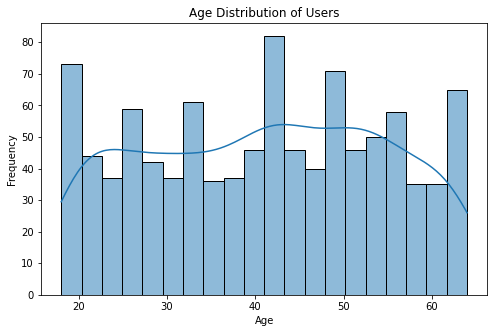

In [11]:
# Plotting Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

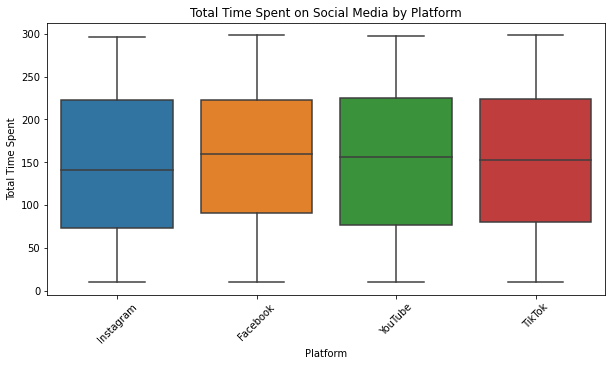

In [12]:
# Boxplot: Total Time Spent on Social Media by Platform

plt.figure(figsize=(10, 5))
sns.boxplot(x="Platform", y="Total Time Spent", data=df)
plt.xticks(rotation=45)
plt.title("Total Time Spent on Social Media by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Time Spent")
plt.show()

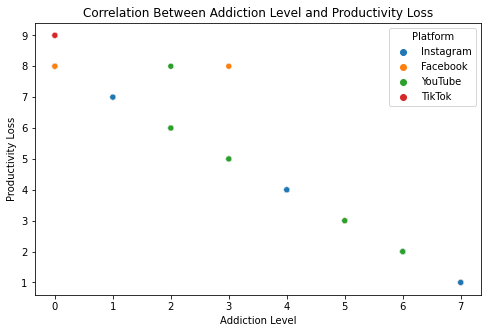

In [13]:
# Scatterplot: Productivity Loss vs. Addiction Level colored by Platform

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Addiction Level", y="ProductivityLoss", hue="Platform", data=df)
plt.title("Correlation Between Addiction Level and Productivity Loss")
plt.xlabel("Addiction Level")
plt.ylabel("Productivity Loss")
plt.show()

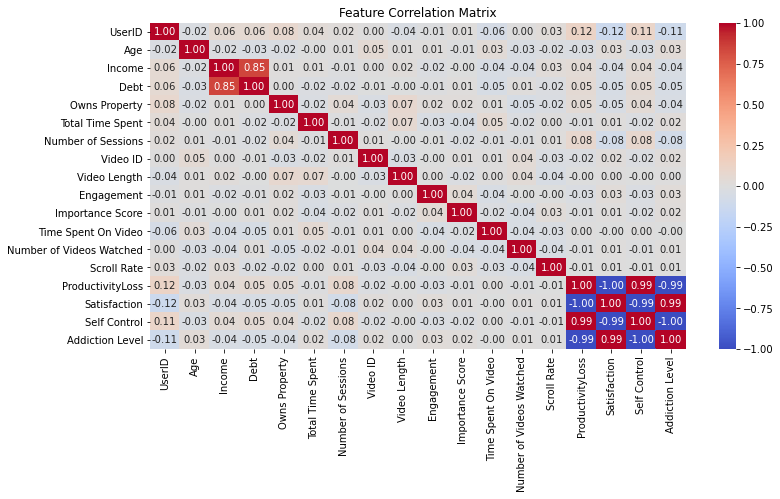

In [14]:
# Correlation heatmap for numerical features

correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [15]:
# Display strongest correlations with Total Time Spent

print("\nStrongest correlations with Total Time Spent:")
print(correlation_matrix["Total Time Spent"].sort_values(ascending=False))


Strongest correlations with Total Time Spent:
Total Time Spent            1.000000
Video Length                0.068607
Time Spent On Video         0.053319
UserID                      0.035689
Addiction Level             0.016086
Satisfaction                0.014210
Income                      0.013326
Scroll Rate                 0.004211
Age                        -0.004166
Number of Sessions         -0.013876
ProductivityLoss           -0.014210
Self Control               -0.016086
Video ID                   -0.018057
Debt                       -0.019020
Number of Videos Watched   -0.020969
Owns Property              -0.023897
Engagement                 -0.033743
Importance Score           -0.043414
Name: Total Time Spent, dtype: float64


In [16]:
# Clustering Analysis (K-Means)

# Selecting features for clustering
cluster_features = df[['Age', 'Total Time Spent', 'ProductivityLoss', 'Addiction Level']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

In [17]:
# Applying K-Means clustering (with 3 clusters)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [18]:
# Evaluate clustering with Silhouette Score

silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print("\nSilhouette Score for K-Means clustering:", silhouette_avg)


Silhouette Score for K-Means clustering: 0.28828327710528456


In [19]:
# Analyze cluster characteristics

cluster_means = df.groupby("Cluster")[["Age", "Total Time Spent", "ProductivityLoss", "Addiction Level"]].mean()
print("\nCluster Means")
print(cluster_means)


Cluster Means
               Age  Total Time Spent  ProductivityLoss  Addiction Level
Cluster                                                                
0        42.005731        151.260745          2.679083         5.320917
1        41.466867        223.662651          6.430723         1.641566
2        39.369906         76.363636          6.476489         1.579937


In [20]:
# Assigning meaningful cluster labels

def assign_cluster_label(cluster):
    if cluster == 0:
        return "Moderate Users (Balanced)"
    elif cluster == 1:
        return "Heavy Users (High Risk)"
    elif cluster == 2:
        return "Occasional Users (Low Engagement)"
    else:
        return "Unknown"

df['Cluster_Label'] = df['Cluster'].apply(assign_cluster_label)

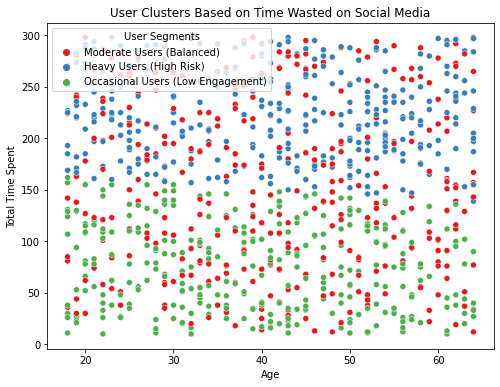

In [21]:
# Visualize clusters based on Age and Total Time Spent

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Total Time Spent", hue="Cluster_Label", palette="Set1", data=df)
plt.title("User Clusters Based on Time Wasted on Social Media")
plt.xlabel("Age")
plt.ylabel("Total Time Spent")
plt.legend(title="User Segments")
plt.show()

In [22]:
# ANOVA test for Total Time Spent differences between clusters

group0 = df[df['Cluster'] == 0]['Total Time Spent']
group1 = df[df['Cluster'] == 1]['Total Time Spent']
group2 = df[df['Cluster'] == 2]['Total Time Spent']
f_stat, p_val = stats.f_oneway(group0, group1, group2)
print("\nANOVA F-statistic for Total Time Spent:", f_stat)
print("ANOVA p-value:", p_val)


ANOVA F-statistic for Total Time Spent: 501.13823810716985
ANOVA p-value: 2.314289473556039e-151
